<a href="https://colab.research.google.com/github/itrinia/code-TA/blob/main/ta_ileene_v3_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gdown

In [2]:
augmented_new_id = "15BJXgsmwZ2P53ouV7smlLlH7KlvD-iWO"
!gdown {augmented_new_id}

val_id = "1f_3HhTYpIQmgBpZThh-V8WuvGYakkn84"
!gdown {val_id}

Downloading...
From (original): https://drive.google.com/uc?id=15BJXgsmwZ2P53ouV7smlLlH7KlvD-iWO
From (redirected): https://drive.google.com/uc?id=15BJXgsmwZ2P53ouV7smlLlH7KlvD-iWO&confirm=t&uuid=590947bc-a97a-4296-a74a-f88d51c81db6
To: /content/augmented-new.zip
100% 4.19G/4.19G [00:34<00:00, 121MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1f_3HhTYpIQmgBpZThh-V8WuvGYakkn84
From (redirected): https://drive.google.com/uc?id=1f_3HhTYpIQmgBpZThh-V8WuvGYakkn84&confirm=t&uuid=e3f18883-a995-4c26-8198-49d88de8c1da
To: /content/val.zip
100% 857M/857M [00:04<00:00, 211MB/s]


In [3]:
!unzip /content/augmented-new.zip
!unzip /content/val.zip

Streaming output truncated to the last 5000 lines.
  inflating: val/images/106-a9b78c4a.png  
  inflating: __MACOSX/val/images/._106-a9b78c4a.png  
  inflating: val/images/108-477363a3.png  
  inflating: __MACOSX/val/images/._108-477363a3.png  
  inflating: val/images/102-ffccab57.png  
  inflating: __MACOSX/val/images/._102-ffccab57.png  
  inflating: val/images/110-5e53ae8e.png  
  inflating: __MACOSX/val/images/._110-5e53ae8e.png  
  inflating: val/images/105-cae52819.png  
  inflating: __MACOSX/val/images/._105-cae52819.png  
  inflating: val/images/108-d4d4e920.png  
  inflating: __MACOSX/val/images/._108-d4d4e920.png  
  inflating: val/images/109-b1b9666f.png  
  inflating: __MACOSX/val/images/._109-b1b9666f.png  
  inflating: val/images/11-bd30cd3d.png  
  inflating: __MACOSX/val/images/._11-bd30cd3d.png  
  inflating: val/images/11-562bd929.png  
  inflating: __MACOSX/val/images/._11-562bd929.png  
  inflating: val/images/106-cbc2219a.png  
  inflating: __MACOSX/val/images/._10

In [4]:
import os

def ensure_folders_exist(folder_paths):
  """Ensures that the specified folders exist.

  Args:
    folder_paths: A list of folder paths to create.
  """
  for path in folder_paths:
    if not os.path.exists(path):
      os.makedirs(path)
      print(f"Created folder: {path}")
    else:
      print(f"Folder already exists: {path}")

# Define the folder paths as variables.
augmented_images_path = "/content/augmented-new/images"
augmented_labels_path = "/content/augmented-new/labels"
val_images_path = "/content/val/images"
val_labels_path = "/content/val/labels"


# Create a list of the folder paths.
folder_paths = [
    augmented_images_path,
    augmented_labels_path,
    val_images_path,
    val_labels_path
]

# Call the function to ensure the folders exist.
ensure_folders_exist(folder_paths)


Folder already exists: /content/augmented-new/images
Folder already exists: /content/augmented-new/labels
Folder already exists: /content/val/images
Folder already exists: /content/val/labels


In [5]:
# Cell 2: Sanity‐check file counts
print("→ Train images:", len(os.listdir(augmented_images_path)))
print("→ Train labels:", len(os.listdir(augmented_labels_path)))
print("→ Val   images:", len(os.listdir(val_images_path)))
print("→ Val   labels:", len(os.listdir(val_labels_path)))

→ Train images: 10550
→ Train labels: 10550
→ Val   images: 2262
→ Val   labels: 2262


In [6]:
labels_path = '/content/val/labels'

# List the files in the labels directory
labels_files = os.listdir(labels_path)
print("Files in the labels directory:", labels_files)

Files in the labels directory: ['103-d30ef888.npz', '105-7ab9d076.npz', '103-811d6e22.npz', '107-daa4c599.npz', '109-1662ca20.npz', '109-557d7f65.npz', '102-b3642fd9.npz', '106-5ff35371.npz', '105-6a4ee2ea.npz', '107-854ebd3b.npz', '110-725ac4f6.npz', '105-3c84a662.npz', '106-6d8173b5.npz', '103-e5cd0939.npz', '105-cbab2087.npz', '108-2b763554.npz', '104-1390046a.npz', '104-95cd0c97.npz', '113-1e8fda1b.npz', '110-2783168f.npz', '106-bdaa021a.npz', '105-c68ec737.npz', '107-150bd2ab.npz', '11-187c734a.npz', '105-bf08dcf3.npz', '104-bd1006f4.npz', '109-fc1501a2.npz', '105-86f77099.npz', '104-a5435b15.npz', '107-ad3a1f7a.npz', '11-db83b45d.npz', '106-f6d95307.npz', '11-03e61e33.npz', '104-b86c12f9.npz', '110-b82516fd.npz', '103-a62ca1d3.npz', '111-509b0658.npz', '103-358a46e5.npz', '108-e02e46b5.npz', '107-1b3290cf.npz', '109-1dddadd7.npz', '102-8467d7f6.npz', '104-d0f3a4e9.npz', '108-9415c0e4.npz', '103-3c657d18.npz', '104-7a0a241c.npz', '104-bfc89c10.npz', '110-db7c4ac0.npz', '109-5ff6da

Statistics:
Total image files: 10550
Total label files: 10550
Matching pairs: 10550
Images without labels: 0
Labels without images: 0
Displaying label array 'x' with shape (512, 512)
Displaying label array 'x' with shape (512, 512)
Displaying label array 'x' with shape (512, 512)
Displaying label array 'x' with shape (512, 512)
Displaying label array 'x' with shape (512, 512)


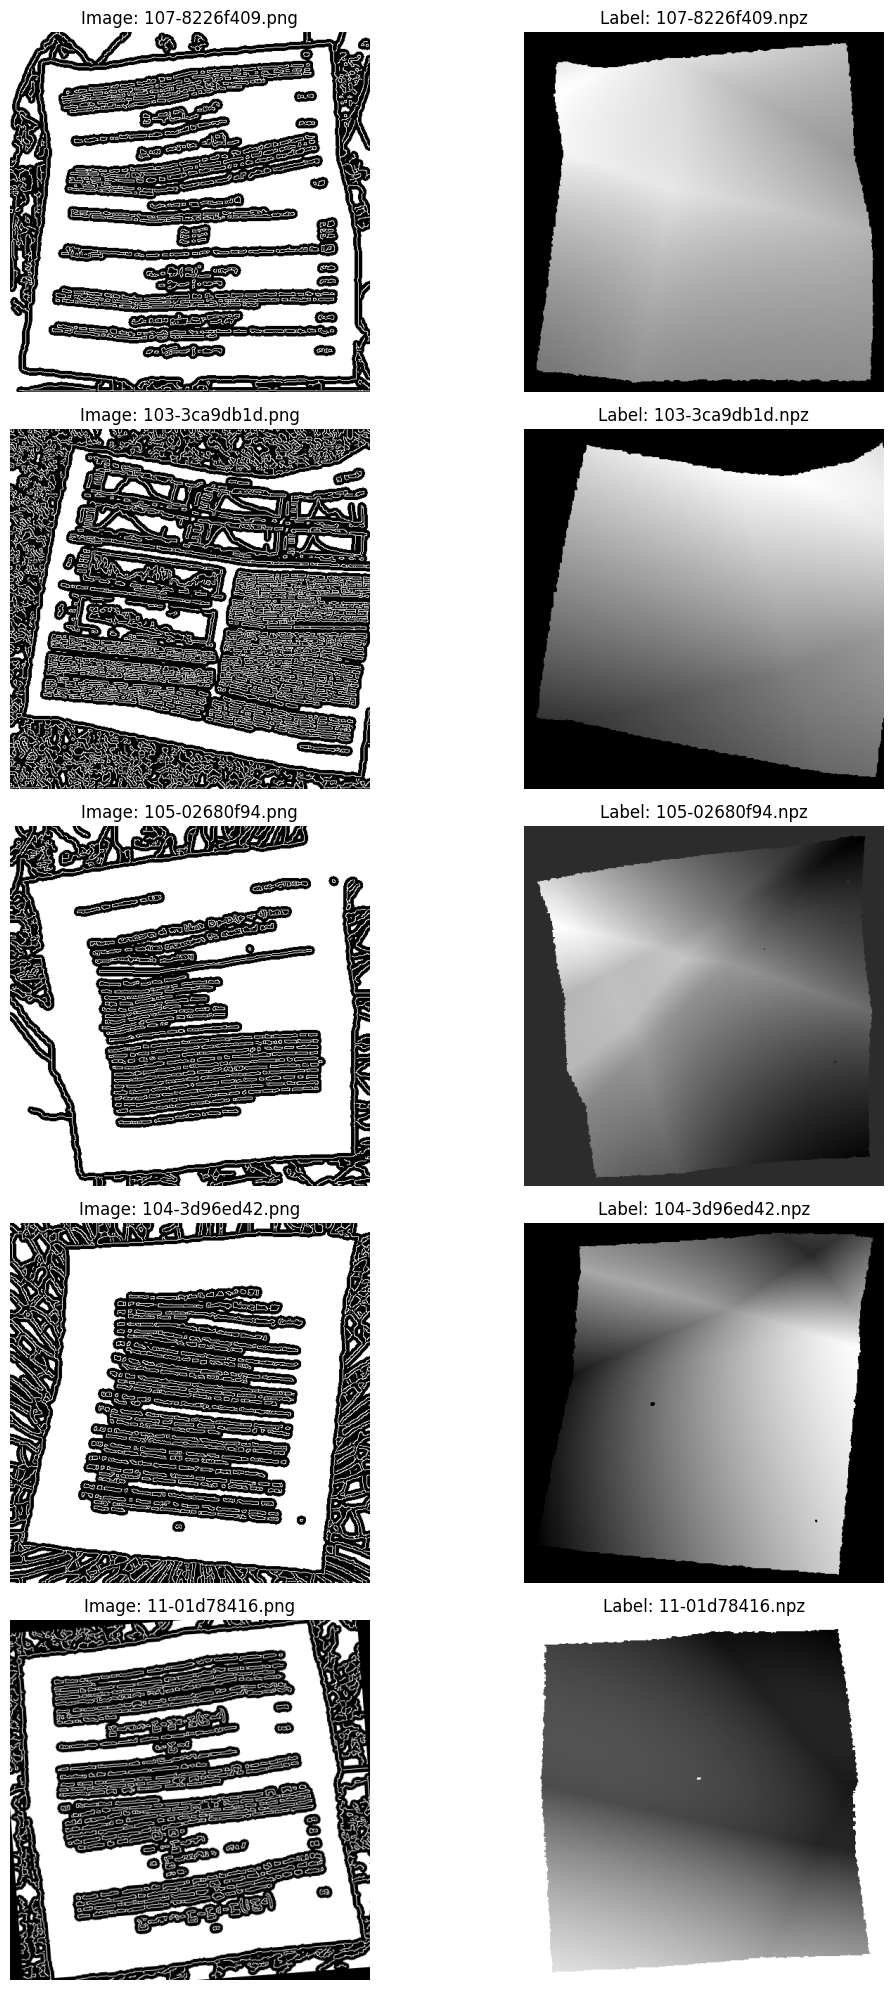


To view more pairs, run the show_pair(index) function with index between 0 and 10549


In [7]:
import os
import glob
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

image_files = glob.glob(os.path.join(augmented_images_path, "*.png"))
label_files = glob.glob(os.path.join(augmented_labels_path, "*.npz"))

# Extract base filenames without extensions
image_basenames = {Path(f).stem: f for f in image_files}
label_basenames = {Path(f).stem: f for f in label_files}

# Find matching pairs
matching_pairs = []
for base_name in image_basenames:
    if base_name in label_basenames:
        matching_pairs.append((image_basenames[base_name], label_basenames[base_name]))

# Print statistics
print(f"Statistics:")
print(f"Total image files: {len(image_files)}")
print(f"Total label files: {len(label_files)}")
print(f"Matching pairs: {len(matching_pairs)}")
print(f"Images without labels: {len(image_files) - len(matching_pairs)}")
print(f"Labels without images: {len(label_files) - len(matching_pairs)}")

# Display 5 sample pairs (image and label visualization side by side)
sample_count = min(5, len(matching_pairs))
fig, axes = plt.subplots(sample_count, 2, figsize=(12, 4*sample_count))

for i in range(sample_count):
    img_path = matching_pairs[i][0]
    lbl_path = matching_pairs[i][1]

    # Set titles for each pair
    if sample_count == 1:
        axes[0].set_title(f"Image: {os.path.basename(img_path)}")
        axes[1].set_title(f"Label: {os.path.basename(lbl_path)}")
    else:
        axes[i, 0].set_title(f"Image: {os.path.basename(img_path)}")
        axes[i, 1].set_title(f"Label: {os.path.basename(lbl_path)}")

    # Load and display image with consistent handling
    try:
        # Open the image and convert to grayscale if it's a document image
        # (since these appear to be document scans that should be consistent)
        img = Image.open(img_path)
        img_array = np.array(img)

        # Check if this is a color image that should be displayed in grayscale
        # Simplified check: if max value is 1, the image is binary
        if img_array.ndim == 3 and np.max(img_array) > 1:
            # This is likely an RGB image - display as is but ensure consistent color handling
            if sample_count == 1:
                axes[0].imshow(img_array)
            else:
                axes[i, 0].imshow(img_array)
        else:
            # Display as grayscale for binary or grayscale images
            if sample_count == 1:
                axes[0].imshow(img_array, cmap='gray')
            else:
                axes[i, 0].imshow(img_array, cmap='gray')

        # Turn off axis for cleaner display
        if sample_count == 1:
            axes[0].axis('off')
        else:
            axes[i, 0].axis('off')
    except Exception as e:
        print(f"Could not display image file {os.path.basename(img_path)}: {str(e)}")
        if sample_count == 1:
            axes[0].text(0.5, 0.5, f"Error loading image: {str(e)}",
                      ha='center', va='center', transform=axes[0].transAxes)
            axes[0].axis('off')
        else:
            axes[i, 0].text(0.5, 0.5, f"Error loading image: {str(e)}",
                        ha='center', va='center', transform=axes[i, 0].transAxes)
            axes[i, 0].axis('off')

    # Load and display label
    try:
        lbl_data = np.load(lbl_path, allow_pickle=True)
        # Display the label data as an image
        if hasattr(lbl_data, 'files'):
            # It's a .npz archive with multiple arrays, display the first array
            key = lbl_data.files[0]
            label_array = lbl_data[key]
            print(f"Displaying label array '{key}' with shape {label_array.shape}")
        else:
            # It's a single array
            label_array = lbl_data
            print(f"Displaying label array with shape {label_array.shape}")

        # Always display labels in grayscale for consistency
        if sample_count == 1:
            axes[1].imshow(label_array, cmap='gray')
            axes[1].axis('off')
        else:
            axes[i, 1].imshow(label_array, cmap='gray')
            axes[i, 1].axis('off')
    except Exception as e:
        print(f"Could not display label file {os.path.basename(lbl_path)}: {str(e)}")
        if sample_count == 1:
            axes[1].text(0.5, 0.5, f"Error loading label: {str(e)}",
                         ha='center', va='center', transform=axes[1].transAxes)
            axes[1].axis('off')
        else:
            axes[i, 1].text(0.5, 0.5, f"Error loading label: {str(e)}",
                            ha='center', va='center', transform=axes[i, 1].transAxes)
            axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

# Optional: Provide a function to explore more pairs
def show_pair(index):
    """Display a specific pair by index"""
    if index < 0 or index >= len(matching_pairs):
        print(f"Index out of range. Must be between 0 and {len(matching_pairs)-1}")
        return

    img_path, lbl_path = matching_pairs[index]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Display image with consistent handling
    try:
        img = Image.open(img_path)
        img_array = np.array(img)

        # Check if this is a color image that should be displayed in grayscale
        if img_array.ndim == 3 and np.max(img_array) > 1:
            # This is likely an RGB image
            ax1.imshow(img_array)
        else:
            # Display as grayscale for binary or grayscale images
            ax1.imshow(img_array, cmap='gray')

        ax1.set_title(f"Image: {os.path.basename(img_path)}")
        ax1.axis('off')
    except Exception as e:
        print(f"Could not display image file {os.path.basename(img_path)}: {str(e)}")
        ax1.text(0.5, 0.5, f"Error loading image: {str(e)}",
              ha='center', va='center', transform=ax1.transAxes)
        ax1.axis('off')

    # Display label
    try:
        lbl_data = np.load(lbl_path, allow_pickle=True)
        if hasattr(lbl_data, 'files'):
            key = lbl_data.files[0]
            label_array = lbl_data[key]
        else:
            label_array = lbl_data

        # Always display labels in grayscale
        ax2.imshow(label_array, cmap='gray')
        ax2.set_title(f"Label: {os.path.basename(lbl_path)}")
        ax2.axis('off')
    except Exception as e:
        ax2.text(0.5, 0.5, f"Error loading label: {str(e)}",
                 ha='center', va='center', transform=ax2.transAxes)
        ax2.axis('off')

    plt.tight_layout()
    plt.show()

print("\nTo view more pairs, run the show_pair(index) function with index between 0 and", len(matching_pairs)-1)

# define model

In [8]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, Activation, Add, Multiply
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import datetime
import glob
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import tensorflow.keras.backend as K
import time

In [18]:
# Create a directory to save models
MODEL_SAVE_PATH = "/content"
os.makedirs(MODEL_SAVE_PATH, exist_ok=True)

# Parameters
IMG_SIZE = 256
BATCH_SIZE = 4
EPOCHS = 50
LEARNING_RATE = 0.0005
INPUT_SHAPE = (IMG_SIZE, IMG_SIZE, 1)

In [19]:
# Define the residual block
def residual_block(x, filters):
    # First convolution layer
    conv1 = Conv2D(filters, kernel_size=(3, 3), padding='same')(x)
    conv1 = Activation('relu')(conv1)

    # Second convolution layer
    conv2 = Conv2D(filters, kernel_size=(3, 3), padding='same')(conv1)
    conv2 = Activation('relu')(conv2)

    # Skip connection
    skip = Add()([x, conv2])
    return skip

# Define the attention mechanism
def attention_block(x, g, filters):
    # Query and Key
    theta_x = Conv2D(filters, kernel_size=(1, 1), strides=(1, 1), padding='same')(x)
    phi_g = Conv2D(filters, kernel_size=(1, 1), strides=(1, 1), padding='same')(g)

    # Add and apply ReLU
    add_xg = Add()([theta_x, phi_g])
    add_xg = Activation('relu')(add_xg)

    # Attention map
    psi = Conv2D(1, kernel_size=(1, 1), strides=(1, 1), padding='same')(add_xg)
    psi = Activation('sigmoid')(psi)

    # Apply attention
    return Multiply()([x, psi])


# Define the DocUNet model
def build_docunet(input_shape=(512, 512, 1)):
    inputs = Input(input_shape)

    # Encoder
    x = Conv2D(64, kernel_size=(3, 3), padding='same')(inputs)
    x = Activation('relu')(x)
    res1 = residual_block(x, 64)
    x = MaxPooling2D(pool_size=(2, 2))(res1)

    x = Conv2D(128, kernel_size=(3, 3), padding='same')(x)
    x = Activation('relu')(x)
    res2 = residual_block(x, 128)
    x = MaxPooling2D(pool_size=(2, 2))(res2)

    x = Conv2D(256, kernel_size=(3, 3), padding='same')(x)
    x = Activation('relu')(x)
    res3 = residual_block(x, 256)
    x = MaxPooling2D(pool_size=(2, 2))(res3)

    x = Conv2D(512, kernel_size=(3, 3), padding='same')(x)
    x = Activation('relu')(x)
    res4 = residual_block(x, 512)
    x = MaxPooling2D(pool_size=(2, 2))(res4)

    # Bottleneck with attention
    g = Conv2D(512, kernel_size=(3, 3), padding='same')(x)
    g = Activation('relu')(g)
    g = attention_block(g, x, 512)

    # Decoder
    x = Conv2DTranspose(512, kernel_size=(3, 3), strides=(2, 2), padding='same')(g)
    x = concatenate([x, res4])
    x = Activation('relu')(x)

    x = Conv2DTranspose(256, kernel_size=(3, 3), strides=(2, 2), padding='same')(x)
    x = concatenate([x, res3])
    x = Activation('relu')(x)

    x = Conv2DTranspose(128, kernel_size=(3, 3), strides=(2, 2), padding='same')(x)
    x = concatenate([x, res2])
    x = Activation('relu')(x)

    x = Conv2DTranspose(64, kernel_size=(3, 3), strides=(2, 2), padding='same')(x)
    x = concatenate([x, res1])
    x = Activation('relu')(x)


    # Output layer
    outputs = Conv2D(1, kernel_size=(1, 1), activation='sigmoid')(x)

    # Build the model
    model = Model(inputs, outputs)
    return model

# custom metrics for eval

In [20]:
# Define SSIM and PSNR metrics for TensorFlow
def tf_ssim(y_true, y_pred):
    """TensorFlow implementation of structural similarity index"""
    return tf.reduce_mean(tf.image.ssim(y_true, y_pred, 1.0))

def tf_psnr(y_true, y_pred):
    """TensorFlow implementation of peak signal-to-noise ratio"""
    return tf.reduce_mean(tf.image.psnr(y_true, y_pred, 1.0))

# data generation

In [21]:
class DocuNetDataGenerator(tf.keras.utils.Sequence):
    """Custom data generator for DocUNet with NPZ labels containing x,y displacement fields"""
    def __init__(self, image_paths, label_paths, batch_size, img_size, is_training=True, **kwargs):
        self.image_paths = image_paths
        self.label_paths = label_paths
        self.batch_size = batch_size
        self.img_size = img_size
        self.is_training = is_training
        self.indexes = np.arange(len(self.image_paths))
        # Call parent constructor to avoid warning
        super().__init__(**kwargs)

        if self.is_training:
            np.random.shuffle(self.indexes)

    def __len__(self):
        return int(np.ceil(len(self.image_paths) / self.batch_size))

    def __getitem__(self, idx):
        # Get batch indexes
        batch_indexes = self.indexes[idx * self.batch_size:(idx + 1) * self.batch_size]

        # Get batch file paths
        batch_image_paths = [self.image_paths[i] for i in batch_indexes]
        batch_label_paths = [self.label_paths[i] for i in batch_indexes]

        # Initialize batch arrays
        batch_size = len(batch_image_paths)
        batch_x = np.zeros((batch_size, self.img_size, self.img_size, 1), dtype=np.float32)
        batch_y = np.zeros((batch_size, self.img_size, self.img_size, 1), dtype=np.float32)

        # Load and preprocess images and labels
        for i, (img_path, label_path) in enumerate(zip(batch_image_paths, batch_label_paths)):
            # Load and preprocess image (PNG)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                print(f"Warning: Failed to load {img_path}")
                continue

            # Resize image
            img = cv2.resize(img, (self.img_size, self.img_size))

            # Normalize to [0, 1]
            img = img.astype(np.float32) / 255.0

            # Add to batch
            batch_x[i,:,:,0] = img

            # Load the label
            try:
                # Load NPZ file
                label_data = np.load(label_path, allow_pickle=True)

                # Check if the NPZ file has the keys 'x' and 'y'
                if hasattr(label_data, 'files') and 'x' in label_data.files and 'y' in label_data.files:
                    # Get x and y displacement maps and handle potential numerical issues
                    x_map = label_data['x'].astype(np.float32)
                    y_map = label_data['y'].astype(np.float32)

                    # Clip extreme values to prevent overflow
                    x_map = np.clip(x_map, -100, 100)
                    y_map = np.clip(y_map, -100, 100)

                    # Calculate displacement magnitude safely using np.hypot to avoid overflow
                    displacement = np.hypot(x_map, y_map)

                    # Handle potential NaN or Inf values
                    displacement = np.nan_to_num(displacement)

                    # Normalize to [0, 1] safely
                    max_val = np.max(displacement)
                    if max_val > 0:
                        displacement = displacement / max_val

                    # Resize to match required dimensions
                    displacement = cv2.resize(displacement, (self.img_size, self.img_size))

                    # Add to batch
                    batch_y[i,:,:,0] = displacement

                # If we couldn't extract a proper label, use a placeholder
                if np.all(batch_y[i,:,:,0] == 0):
                    # Generate a gradient as a placeholder
                    x, y = np.meshgrid(np.linspace(0, 1, self.img_size), np.linspace(0, 1, self.img_size))
                    batch_y[i,:,:,0] = x * y  # Simple gradient pattern
                    print(f"Warning: Using placeholder for {label_path}")

            except Exception as e:
                print(f"Error processing label {label_path}: {e}")
                # Use a gradient placeholder
                x, y = np.meshgrid(np.linspace(0, 1, self.img_size), np.linspace(0, 1, self.img_size))
                batch_y[i,:,:,0] = x * y

        return batch_x, batch_y

    def on_epoch_end(self):
        """Shuffle indexes after each epoch"""
        if self.is_training:
            np.random.shuffle(self.indexes)

# Data Loading and Preparation

In [22]:
def load_file_paths(images_dir, labels_dir):
    """Load and match image and label file paths"""
    # Find all image and label files
    image_paths = sorted(glob.glob(os.path.join(images_dir, "*.png")))
    label_paths = sorted(glob.glob(os.path.join(labels_dir, "*.npz")))

    print(f"Found {len(image_paths)} image files and {len(label_paths)} label files")

    # Match image and label files by base name
    paired_images = []
    paired_labels = []

    # Create a dictionary of label paths for faster lookup
    label_dict = {os.path.splitext(os.path.basename(path))[0]: path for path in label_paths}

    for img_path in image_paths:
        # Get base name without extension
        img_name = os.path.splitext(os.path.basename(img_path))[0]

        # Look for matching label file
        if img_name in label_dict:
            paired_images.append(img_path)
            paired_labels.append(label_dict[img_name])

    print(f"Found {len(paired_images)} paired image-label files")
    return paired_images, paired_labels

# Set up directories (update these paths to match your environment)
augmented_images_path = "/content/augmented-new/images"
augmented_labels_path = "/content/augmented-new/labels"
val_images_path = "/content/val/images"
val_labels_path = "/content/val/labels"

# Define image size and batch size
IMG_SIZE = 256
BATCH_SIZE = 16

# Load training data
print(f"Loading training data from {augmented_images_path} and {augmented_labels_path}")
train_img_paths, train_label_paths = load_file_paths(augmented_images_path, augmented_labels_path)

# Load validation data
print(f"Loading validation data from {val_images_path} and {val_labels_path}")
val_img_paths, val_label_paths = load_file_paths(val_images_path, val_labels_path)

# Check if we have data
if len(train_img_paths) == 0:
    raise ValueError("No paired training image-label files found. Check your data paths.")
if len(val_img_paths) == 0:
    raise ValueError("No paired validation image-label files found. Check your data paths.")

print(f"Training samples: {len(train_img_paths)}")
print(f"Validation samples: {len(val_img_paths)}")

# Examine a sample label file to understand its structure
if len(train_label_paths) > 0:
    sample_label_path = train_label_paths[0]
    print(f"Examining label file: {sample_label_path}")
    try:
        label_data = np.load(sample_label_path, allow_pickle=True)
        print(f"Type: {type(label_data)}")
        print(f"Has 'files' attribute: {hasattr(label_data, 'files')}")
        print(f"Shape: {label_data.shape if hasattr(label_data, 'shape') else 'No shape'}")

        if hasattr(label_data, 'files'):
            print(f"Keys: {label_data.files}")

            for key in label_data.files:
                arr = label_data[key]
                print(f"  Key '{key}' shape: {arr.shape}, dtype: {arr.dtype}, min: {arr.min()}, max: {arr.max()}")
    except Exception as e:
        print(f"Error: {e}")

# Create data generators
train_generator = DocuNetDataGenerator(
    train_img_paths,
    train_label_paths,
    BATCH_SIZE,
    IMG_SIZE,
    is_training=True,
    workers=1,
    use_multiprocessing=False,
    max_queue_size=2
)

val_generator = DocuNetDataGenerator(
    val_img_paths,
    val_label_paths,
    BATCH_SIZE,
    IMG_SIZE,
    is_training=False,
    workers=1,
    use_multiprocessing=False,
    max_queue_size=2
)

Loading training data from /content/augmented-new/images and /content/augmented-new/labels
Found 10550 image files and 10550 label files
Found 10550 paired image-label files
Loading validation data from /content/val/images and /content/val/labels
Found 2262 image files and 2262 label files
Found 2262 paired image-label files
Training samples: 10550
Validation samples: 2262
Examining label file: /content/augmented-new/labels/1-d2a1c88c.npz
Type: <class 'numpy.lib.npyio.NpzFile'>
Has 'files' attribute: True
Shape: No shape
Keys: ['x', 'y']
  Key 'x' shape: (512, 512), dtype: float16, min: -102.0625, max: 29.734375
  Key 'y' shape: (512, 512), dtype: float16, min: -103.9375, max: 0.0


# Visualize Sample Data:

Visualizing sample training data:


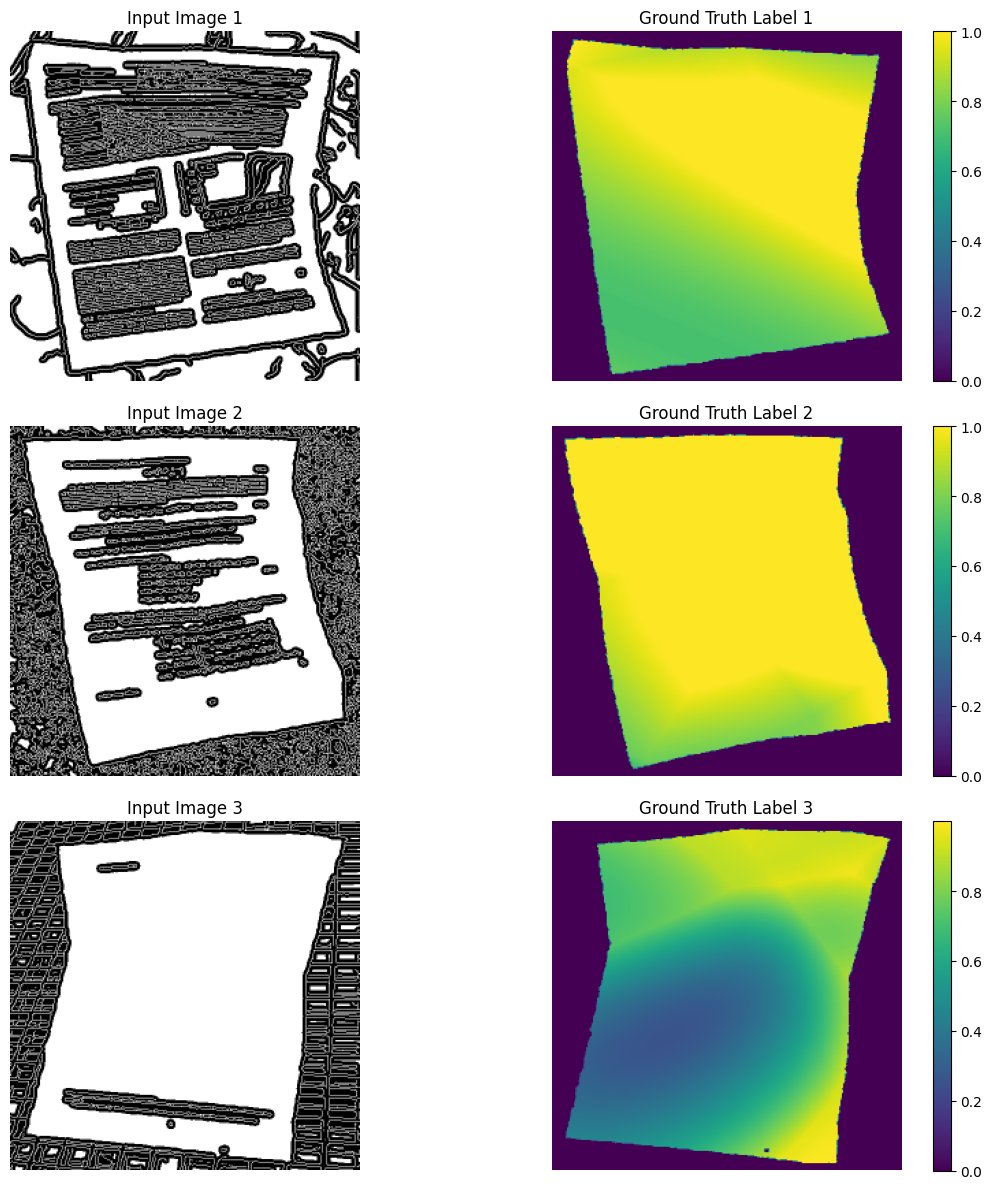


Detailed examination of a sample label file:
Detailed examination of: /content/augmented-new/labels/1-d2a1c88c.npz
File contains keys: ['x', 'y']


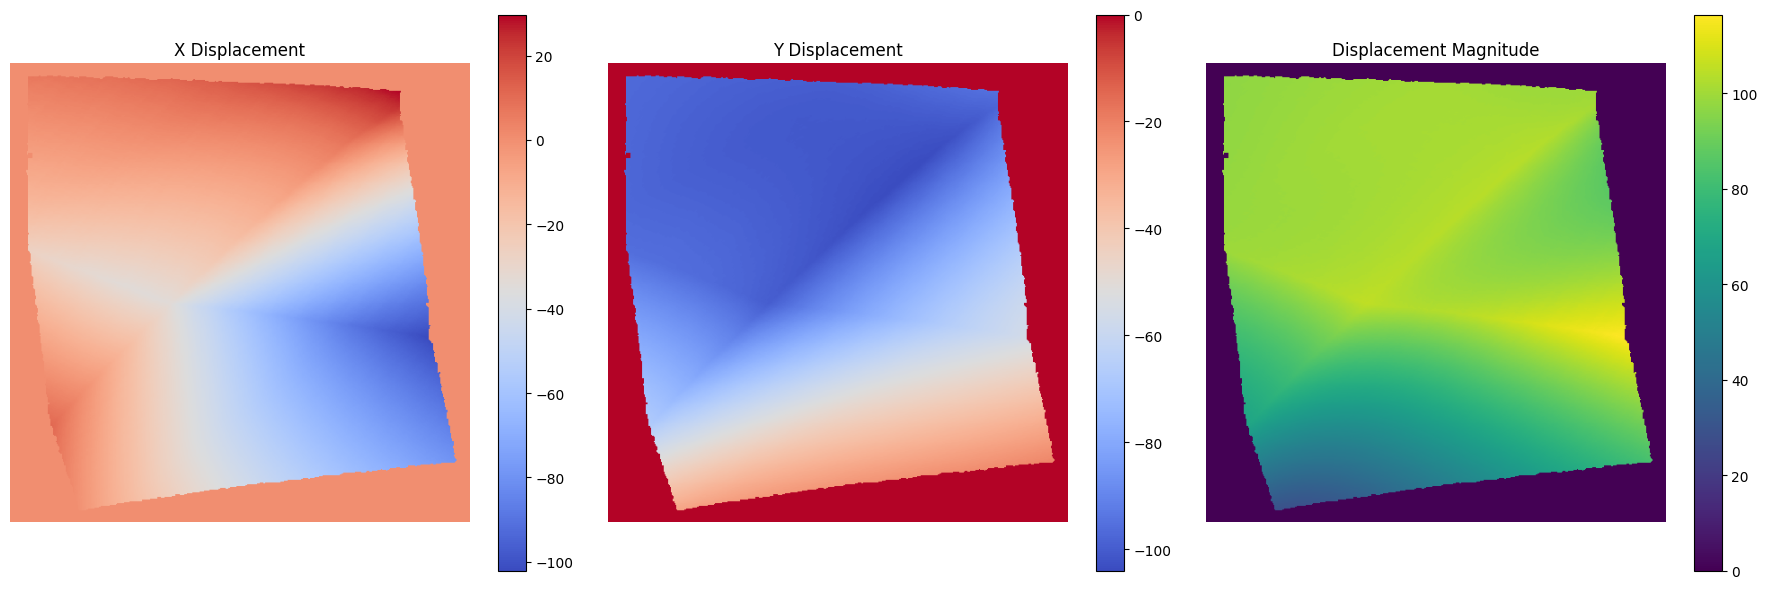

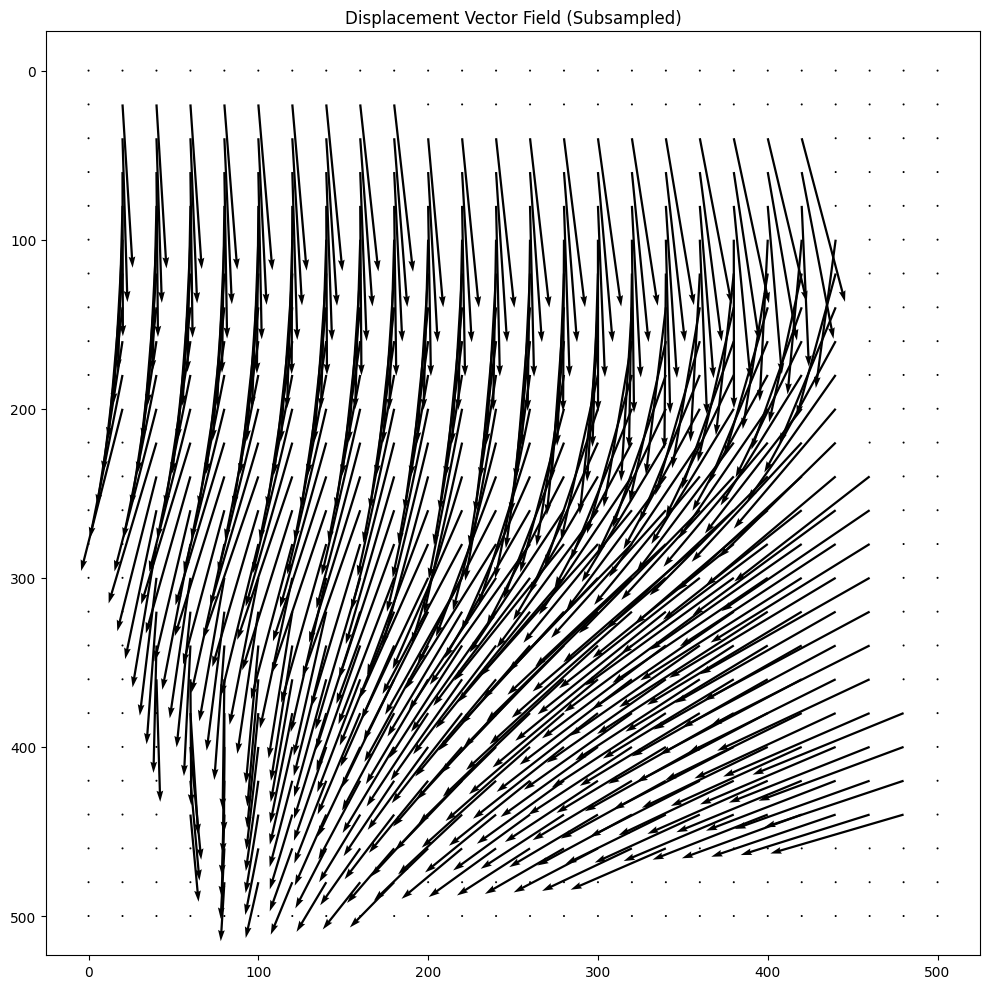

Key 'x': shape=(512, 512), dtype=float16, min=-102.0625, max=29.734375
Key 'y': shape=(512, 512), dtype=float16, min=-103.9375, max=0.0


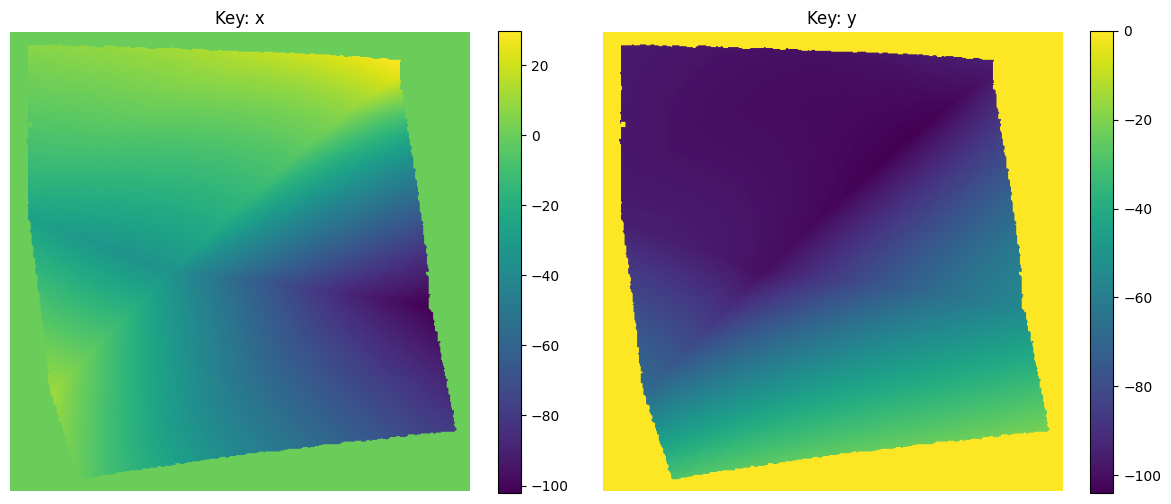

In [14]:
def visualize_samples(generator, num_samples=3):
    """Visualize samples from the data generator"""
    # Get batch
    x_batch, y_batch = generator[0]

    plt.figure(figsize=(12, 4*num_samples))

    for i in range(min(num_samples, len(x_batch))):
        # Display input image
        plt.subplot(num_samples, 2, i*2+1)
        plt.imshow(x_batch[i, :, :, 0], cmap='gray')
        plt.title(f"Input Image {i+1}")
        plt.axis('off')

        # Display label visualization
        plt.subplot(num_samples, 2, i*2+2)
        plt.imshow(y_batch[i, :, :, 0], cmap='viridis')  # Using viridis for better visualization
        plt.colorbar()
        plt.title(f"Ground Truth Label {i+1}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def examine_label_file(label_path):
    """Examine and visualize a label file in detail"""
    print(f"Detailed examination of: {label_path}")

    try:
        # Load the NPZ file
        label_data = np.load(label_path, allow_pickle=True)

        if hasattr(label_data, 'files'):
            print(f"File contains keys: {label_data.files}")

            # If file contains x and y displacement fields, visualize them
            if 'x' in label_data.files and 'y' in label_data.files:
                x_map = label_data['x']
                y_map = label_data['y']

                plt.figure(figsize=(18, 6))

                # Plot x displacement field
                plt.subplot(1, 3, 1)
                plt.imshow(x_map, cmap='coolwarm')
                plt.colorbar()
                plt.title('X Displacement')
                plt.axis('off')

                # Plot y displacement field
                plt.subplot(1, 3, 2)
                plt.imshow(y_map, cmap='coolwarm')
                plt.colorbar()
                plt.title('Y Displacement')
                plt.axis('off')

                # Plot magnitude of displacement (this is what we use as our label)
                magnitude = np.sqrt(x_map**2 + y_map**2)
                plt.subplot(1, 3, 3)
                plt.imshow(magnitude, cmap='viridis')
                plt.colorbar()
                plt.title('Displacement Magnitude')
                plt.axis('off')

                plt.tight_layout()
                plt.show()

                # Draw a subsampled vector field to better understand the distortion
                plt.figure(figsize=(10, 10))

                # Subsample the displacement fields for clearer visualization
                step = max(1, min(x_map.shape) // 25)  # Adjust based on image size
                Y, X = np.mgrid[:x_map.shape[0]:step, :x_map.shape[1]:step]
                U = x_map[::step, ::step]  # X-displacement
                V = y_map[::step, ::step]  # Y-displacement

                plt.quiver(X, Y, U, V, scale=1, scale_units='xy')
                plt.title('Displacement Vector Field (Subsampled)')
                plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
                plt.axis('equal')
                plt.tight_layout()
                plt.show()

            # Visualize all arrays in the file
            num_keys = len(label_data.files)
            fig_rows = max(1, (num_keys + 1) // 2)  # Calculate rows needed

            plt.figure(figsize=(12, 5 * fig_rows))

            for idx, key in enumerate(label_data.files):
                array = label_data[key]
                print(f"Key '{key}': shape={array.shape}, dtype={array.dtype}, min={array.min()}, max={array.max()}")

                # Add a subplot for this array
                plt.subplot(fig_rows, 2, idx+1)

                # Display array as appropriate
                if len(array.shape) == 2:
                    plt.imshow(array, cmap='viridis')
                    plt.colorbar()
                    plt.title(f"Key: {key}")
                elif len(array.shape) == 1:
                    plt.plot(array)
                    plt.title(f"Key: {key} (1D array)")
                else:
                    plt.text(0.5, 0.5, f"Array shape: {array.shape}\nCannot visualize",
                             ha='center', va='center')

                plt.axis('off')

            plt.tight_layout()
            plt.show()

        else:
            # Direct numpy array
            plt.figure(figsize=(8, 8))
            plt.imshow(label_data, cmap='viridis')
            plt.colorbar()
            plt.title(f"Direct array, shape: {label_data.shape}")
            plt.axis('off')
            plt.tight_layout()
            plt.show()

    except Exception as e:
        print(f"Error examining file: {e}")

# Visualize sample training data
print("Visualizing sample training data:")
visualize_samples(train_generator, num_samples=3)

# Examine sample label file in detail
if len(train_label_paths) > 0:
    print("\nDetailed examination of a sample label file:")
    examine_label_file(train_label_paths[0])

# Build and Compile Model:

In [23]:
# Build the model
model = build_docunet(INPUT_SHAPE)

# Compile the model with binary crossentropy loss and SSIM/PSNR metrics
def combined_loss(y_true, y_pred):
    # Binary cross-entropy for pixel-wise accuracy
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)

    # Add structural similarity component
    ssim_loss = 1 - tf_ssim(y_true, y_pred)

    # Weighted combination
    return 0.7 * bce + 0.3 * ssim_loss

# In model.compile:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss=combined_loss,
    metrics=['accuracy', tf_ssim, tf_psnr]
)

# Print model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 256, 256,  │        640 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_19       │ (None, 256, 256,  │          0 │ conv2d_17[0][0]   │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 256, 256,  │     36,928 │ activation_19[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_20       │ (None, 256, 256,  │          0 │ conv2d_18[0][0]   │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 256, 256,  │     36,928 │ activation_20[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_21       │ (None, 256, 256,  │          0 │ conv2d_19[0][0]   │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 256, 256,  │          0 │ activation_19[0]… │
│                     │ 64)               │            │ activation_21[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 128, 128,  │          0 │ add_5[0][0]       │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 128, 128,  │     73,856 │ max_pooling2d_4[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_22       │ (None, 128, 128,  │          0 │ conv2d_20[0][0]   │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 128, 128,  │    147,584 │ activation_22[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_23       │ (None, 128, 128,  │          0 │ conv2d_21[0][0]   │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 128, 128,  │    147,584 │ activation_23[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_24       │ (None, 128, 128,  │          0 │ conv2d_22[0][0]   │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_6 (Add)         │ (None, 128, 128,  │          0 │ activation_22[0]… │
│                     │ 128)              │            │ activation_24[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 64, 64,    │          0 │ add_6[0][0]     

 Total params: 16,161,218 (61.65 MB)

 Trainable params: 16,161,218 (61.65 MB)

 Non-trainable params: 0 (0.00 B)

# Set Up Callbacks

In [24]:
# Setup callbacks
checkpoint_dir = './checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

callbacks = [
    # Save only best model to save disk space
    tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(checkpoint_dir, 'best_model.h5'),
        save_best_only=True,
        monitor='val_loss',
        mode='min'
    ),
    # Early stopping to prevent overfitting
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    ),
    # Reduce learning rate when plateauing
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,
        min_lr=1e-6,
        verbose=1
    ),
    # Log training progress
    tf.keras.callbacks.CSVLogger('training_log.csv')
]


# Train the Model:

In [26]:
# Train the model
print(f"Starting training with {len(train_img_paths)} training samples and {len(val_img_paths)} validation samples")
print(f"Batch size: {BATCH_SIZE}, Epochs: {EPOCHS}, Learning rate: {LEARNING_RATE}")

start_time = time.time()

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=1
)

training_time = time.time() - start_time
print(f"Training completed in {training_time/60:.2f} minutes")

Starting training with 10550 training samples and 2262 validation samples
Batch size: 16, Epochs: 50, Learning rate: 0.0005
Epoch 1/50
660/660 ━━━━━━━━━━━━━━━━━━━━ 0s 610ms/step - accuracy: 0.4028 - loss: 0.3771 - tf_psnr: 16.8913 - tf_ssim: 0.8197

660/660 ━━━━━━━━━━━━━━━━━━━━ 442s 669ms/step - accuracy: 0.4028 - loss: 0.3771 - tf_psnr: 16.8913 - tf_ssim: 0.8197 - val_accuracy: 0.4275 - val_loss: 0.3505 - val_tf_psnr: 17.3989 - val_tf_ssim: 0.8336 - learning_rate: 2.5000e-04
Epoch 2/50
660/660 ━━━━━━━━━━━━━━━━━━━━ 439s 665ms/step - accuracy: 0.4011 - loss: 0.3752 - tf_psnr: 16.9518 - tf_ssim: 0.8237 - val_accuracy: 0.4271 - val_loss: 0.3519 - val_tf_psnr: 17.4441 - val_tf_ssim: 0.8201 - learning_rate: 2.5000e-04
Epoch 3/50
660/660 ━━━━━━━━━━━━━━━━━━━━ 0s 610ms/step - accuracy: 0.4046 - loss: 0.3740 - tf_psnr: 16.9674 - tf_ssim: 0.8242

660/660 ━━━━━━━━━━━━━━━━━━━━ 443s 667ms/step - accuracy: 0.4046 - loss: 0.3740 - tf_psnr: 16.9673 - tf_ssim: 0.8242 - val_accuracy: 0.4273 - val_loss: 0.3500 - val_tf_psnr: 17.3150 - val_tf_ssim: 0.8492 - learning_rate: 2.5000e-04
Epoch 4/50
660/660 ━━━━━━━━━━━━━━━━━━━━ 440s 666ms/step - accuracy: 0.4016 - loss: 0.3752 - tf_psnr: 16.9086 - tf_ssim: 0.8302 - val_accuracy: 0.4272 - val_loss: 0.3503 - val_tf_psnr: 17.3881 - val_tf_ssim: 0.8436 - learning_rate: 2.5000e-04
Epoch 5/50
 74/660 ━━━━━━━━━━━━━━━━━━━━ 5:57 609ms/step - accuracy: 0.4131 - loss: 0.3568 - tf_psnr: 17.4964 - tf_ssim: 0.8483

KeyboardInterrupt: 

# Save the Final Model:

In [ ]:
# Save the final model
final_model_path = os.path.join(MODEL_SAVE_PATH, 'docunet.h5')
model.save(final_model_path)
print(f"Final model saved to {final_model_path}")

# Visualize Training History

In [ ]:
# Plot training history
def plot_training_history(history):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Plot loss
    axes[0, 0].plot(history.history['loss'])
    axes[0, 0].plot(history.history['val_loss'])
    axes[0, 0].set_title('Model Loss')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].legend(['Train', 'Validation'], loc='upper right')
    axes[0, 0].grid(True)

    # Plot accuracy
    axes[0, 1].plot(history.history['accuracy'])
    axes[0, 1].plot(history.history['val_accuracy'])
    axes[0, 1].set_title('Model Accuracy')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].legend(['Train', 'Validation'], loc='lower right')
    axes[0, 1].grid(True)

    # Plot SSIM
    axes[1, 0].plot(history.history['tf_ssim'])
    axes[1, 0].plot(history.history['val_tf_ssim'])
    axes[1, 0].set_title('Structural Similarity (SSIM)')
    axes[1, 0].set_ylabel('SSIM')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].legend(['Train', 'Validation'], loc='lower right')
    axes[1, 0].grid(True)

    # Plot PSNR
    axes[1, 1].plot(history.history['tf_psnr'])
    axes[1, 1].plot(history.history['val_tf_psnr'])
    axes[1, 1].set_title('Peak Signal-to-Noise Ratio (PSNR)')
    axes[1, 1].set_ylabel('PSNR (dB)')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].legend(['Train', 'Validation'], loc='lower right')
    axes[1, 1].grid(True)

    plt.tight_layout()
    plt.savefig(os.path.join(MODEL_SAVE_PATH, 'training_history.png'))
    plt.show()

# Plot training history
plot_training_history(history)

# Save history as CSV for later analysis
import pandas as pd
history_df = pd.DataFrame(history.history)
history_csv_path = os.path.join(MODEL_SAVE_PATH, 'training_history.csv')
history_df.to_csv(history_csv_path, index=False)
print(f"Training history saved to {history_csv_path}")

# Visualize Model Predictions:

In [ ]:
# Visualize model predictions on validation data
def visualize_predictions(model, generator, num_samples=3):
    # Get a batch of validation data
    x_batch, y_batch = generator[0]

    # Make predictions
    predictions = model.predict(x_batch[:num_samples])

    # Display images, ground truth, and predictions
    plt.figure(figsize=(15, 5*num_samples))
    for i in range(num_samples):
        # Display input image
        plt.subplot(num_samples, 3, i*3+1)
        plt.imshow(x_batch[i, :, :, 0], cmap='gray')
        plt.title('Distorted Input')
        plt.axis('off')

        # Display ground truth
        plt.subplot(num_samples, 3, i*3+2)
        plt.imshow(y_batch[i, :, :, 0], cmap='gray')
        plt.title('Ground Truth')
        plt.axis('off')

        # Display prediction
        plt.subplot(num_samples, 3, i*3+3)
        plt.imshow(predictions[i, :, :, 0], cmap='gray')
        plt.title('Model Prediction')
        plt.axis('off')

        # Calculate SSIM and PSNR for this sample
        sample_ssim = ssim(y_batch[i, :, :, 0], predictions[i, :, :, 0], data_range=1.0)
        sample_psnr = psnr(y_batch[i, :, :, 0], predictions[i, :, :, 0], data_range=1.0)

        print(f"Sample {i+1} - SSIM: {sample_ssim:.4f}, PSNR: {sample_psnr:.2f}dB")

    plt.tight_layout()
    plt.savefig(os.path.join(MODEL_SAVE_PATH, 'prediction_samples.png'))
    plt.show()

# Visualize predictions
print("Visualizing model predictions:")
visualize_predictions(model, val_generator, num_samples=3)

# Evaluate Model and Finish:

In [ ]:
# Evaluate model on validation set
print("Evaluating model on validation set...")
val_results = model.evaluate(val_generator, verbose=1)
print(f"Validation Loss: {val_results[0]:.4f}")
print(f"Validation Accuracy: {val_results[1]:.4f}")
print(f"Validation SSIM: {val_results[2]:.4f}")
print(f"Validation PSNR: {val_results[3]:.2f}dB")

# Save evaluation results
eval_results = {
    'val_loss': float(val_results[0]),
    'val_accuracy': float(val_results[1]),
    'val_ssim': float(val_results[2]),
    'val_psnr': float(val_results[3])
}

import json
with open(os.path.join(MODEL_SAVE_PATH, 'evaluation_results.json'), 'w') as f:
    json.dump(eval_results, f)

print("\n=== DocUNet Training Complete ===")
print(f"Model saved to: {final_model_path}")
print(f"Best model saved to: {os.path.join(MODEL_SAVE_PATH, 'docunet_best.h5')}")
print(f"Training history saved to: {history_csv_path}")
print(f"Evaluation results saved to: {os.path.join(MODEL_SAVE_PATH, 'evaluation_results.json')}")
print("\nNext steps:")
print("1. Download the model (.h5 file) to use locally")
print("2. Use the model for inference on new distorted document images")
print("3. Fine-tune the model if needed with additional data")